![Bluemetrica](../bluemetrica_large.png)

# Drzewa decyzyjne, lasy losowe, SVM
-------------------

# Przygotowanie danych

In [1]:
import numpy as np         # algebra liniowa
import pandas as pd        # praca z danymi
import matplotlib.pyplot as plt  # wykresy
import seaborn as sns      # wizualizacje statystczne
%matplotlib inline  
# wykresy wyswietlane od razu

In [2]:
credit = pd.read_csv("..\data\credit.csv")

### Oglądamy dane

In [3]:
credit.head()

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [6]:
credit.describe()

months_loan_duration        amount  percent_of_income  \
count           1000.000000   1000.000000        1000.000000   
mean              20.903000   3271.258000           2.973000   
std               12.058814   2822.736876           1.118715   
min                4.000000    250.000000           1.000000   
25%               12.000000   1365.500000           2.000000   
50%               18.000000   2319.500000           3.000000   
75%               24.000000   3972.250000           4.000000   
max               72.000000  18424.000000           4.000000   

       years_at_residence          age  existing_loans_count   dependents  
count         1000.000000  1000.000000           1000.000000  1000.000000  
mean             2.845000    35.546000              1.407000     1.155000  
std              1.103718    11.375469              0.577654     0.362086  
min              1.000000    19.000000              1.000000     1.000000  
25%              2.000000    27.000000              1.000000     1.000000  
50%              3.000000    33.000000              1.000000     1.000000  
75%              4.000000    42.000000              2.000000     1.000000  
max              4.000000    75.000000              4.000000     2.000000

Text(0.5,1,'Loan amount histogram')

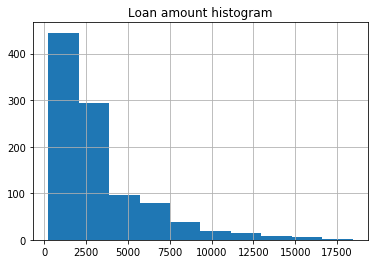

In [8]:
credit.amount.hist()
plt.title("Loan amount histogram")

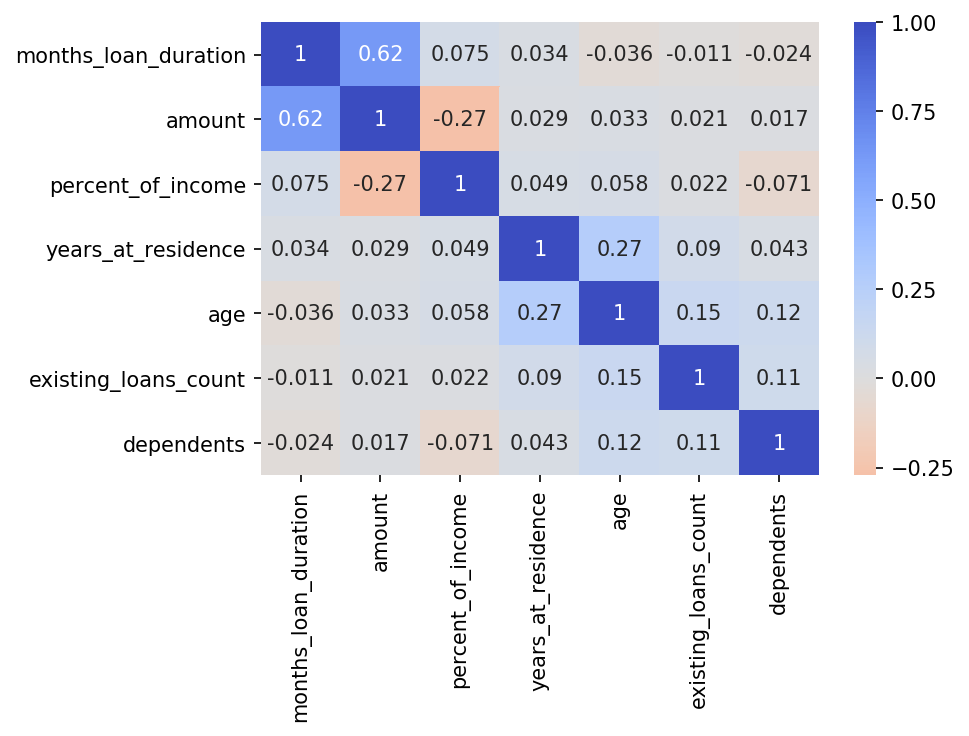

In [10]:
plt.figure(dpi = 150)
sns.heatmap(credit.corr(), cmap = "coolwarm_r", center = 0, annot = True)

In [5]:
credit.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [6]:
credit['default'].value_counts()

no     700
yes    300
Name: default, dtype: int64

### Podział na zbiór treningowy i testowy

In [11]:
# zamiana zmiennych kategorii na dummies (0 - 1) 
credit_dum = pd.get_dummies(credit, drop_first=True) 

In [12]:
from sklearn.model_selection import train_test_split
X = credit_dum.drop('default_yes', axis = 1)
y = credit_dum['default_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 123)

In [13]:
print(X_train.shape); print(X_test.shape)

(800, 35)
(200, 35)


## Import bibliotek

In [14]:
# drzewa decyzyjne
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# miary jakości modelu, model svm
from sklearn import metrics, svm
# poszukiwanie parametrów
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
# klasyfikator RF
from sklearn.ensemble import RandomForestClassifier

### Budowa drzewa decyzyjnego

#### Stwórzmy nasze drzewo online
http://webgraphviz.com/

Na stronie możemy wkleić zawartość pliku .dot w celu wizualizacji grafu

In [38]:
model_tree = DecisionTreeClassifier(max_depth = 5)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
print(model_tree.score(X_train, y_train)) # Accuracy dla zbioru treningowego
# Miara Accuracy
print(model_tree.score(X_test, y_test)) # Accuracy dla zbioru testowego

0.78
0.72


Zróbcie predykcje z tego modelu i narysujcie macierz pomyłek (confusion matrix)

In [40]:
prob_tree = model_tree.predict_proba(X_test)[:,1]

In [41]:
prob_tree

array([0.49411765, 0.5       , 0.16666667, 0.27922078, 0.27922078,
       0.27922078, 0.49411765, 0.27922078, 0.49411765, 0.27922078,
       0.27922078, 0.5       , 0.06153846, 0.49411765, 0.27922078,
       0.        , 0.27922078, 0.49411765, 0.49411765, 0.27922078,
       0.11111111, 0.27922078, 0.49411765, 0.27922078, 0.16666667,
       0.49411765, 0.8       , 0.11111111, 0.16666667, 0.8       ,
       0.5       , 0.16666667, 0.27922078, 0.68181818, 0.27922078,
       0.16666667, 0.27922078, 0.16666667, 0.5       , 0.5       ,
       0.49411765, 0.27922078, 0.11111111, 0.68181818, 0.025     ,
       0.27922078, 0.49411765, 0.06153846, 0.11111111, 0.        ,
       0.11111111, 0.25      , 0.        , 1.        , 0.27922078,
       0.11111111, 0.49411765, 0.27922078, 0.49411765, 0.49411765,
       0.        , 0.025     , 0.49411765, 0.5       , 1.        ,
       0.25      , 0.27922078, 0.8       , 0.68181818, 0.11111111,
       0.06153846, 0.49411765, 0.11111111, 0.06153846, 0.66666

In [44]:
tresh = 0.5 # próg odcięcia - przy jakim prawdopodobieństwie przestajemy dawać kredyt
pred_tree = np.where(prob_tree > tresh, 1, 0)

In [45]:
print(metrics.classification_report(y_test, pred_tree))
print(metrics.confusion_matrix(y_test, pred_tree))

             precision    recall  f1-score   support

          0       0.73      0.94      0.82       139
          1       0.62      0.21      0.32        61

avg / total       0.70      0.72      0.67       200

[[131   8]
 [ 48  13]]


## Wizualizacja drzewa

Stwórzmy nasze drzewo online
http://webgraphviz.com/

In [22]:
from sklearn import tree
import pydotplus

In [48]:
%pwd

'C:\\Users\\ewaru\\Documents\\Python\\Machine Learning z Python\\Szkolenie ML z Python 29-31.08\\Materiały dla uczestników puste\\6. Decision trees'

In [47]:
tree.export_graphviz(model_tree, out_file = "drzewo.dot",  feature_names=X_train.columns, class_names= ["OK", "Bad"])

Krzywa roc (wykorzystamy nasza funkję którą napisaliśmy przy okazji regresji logistycznej)

In [24]:
import sys
sys.path.insert(0, "../data/")

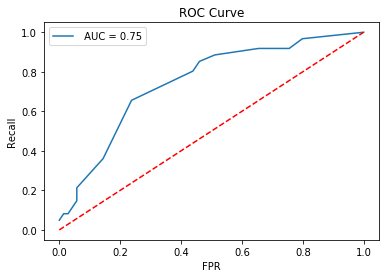

In [46]:
from plot_roc import plot_roc
plot_roc(y_test, prob_tree)

### Lasy losowe - Random forest

In [49]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
n_estimators
max_depth

Zbuduj model Random Forest korzystając z metody GridSearchCV

In [59]:
params = {
    "max_depth" : [2,4,6,8,10],
    "n_estimators" : [10, 50, 100, 500, 1000],
    'max_features' : ['auto', 20, 10, 5]
}

In [60]:
model_rf_grid = GridSearchCV(model_rf,   
                            params,      # parametry do tuningu
                            n_jobs = -1,   # pozwalamy na obliczenia równoległe
                            scoring="roc_auc") # wybieramy najlepszy model wg. miary AUC

model_rf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 4, 6, 8, 10], 'n_estimators': [10, 50, 100, 500, 1000], 'max_features': ['auto', 20, 10, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [61]:
print(model_rf_grid.score(X_train, y_train))
model_rf_grid.score(X_test, y_test)

0.8517888707403843


0.8062271494279986

In [62]:
model_rf_grid.best_params_

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 50}

In [63]:
prob_rf = model_rf_grid.predict_proba(X_test)[:,1]

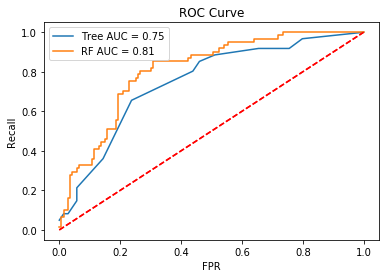

In [64]:
plot_roc(y_test, prob_tree, model_name= "Tree")
plot_roc(y_test, prob_rf, model_name= "RF")